# Agrupacion de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos a crear un dataset a partir de numeros aleatorios

In [2]:
gender = ["Male", "Female"]
income = ["Poor", "Middie Class", "Rich"]

In [3]:
n = 500
gender_data = []
income_data = []

for i in range(0, n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [4]:
gender_data[1:10]

['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female']

In [5]:
income_data[1:10]

['Middie Class',
 'Poor',
 'Poor',
 'Middie Class',
 'Rich',
 'Middie Class',
 'Poor',
 'Rich',
 'Rich']

In [6]:
#N(0,1)
#N(m, s) -> m + s * z

height = 160 + 30 * np.random.randn(n)
weight = 65 +25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 30000 + 6500 * np.random.randn(n)

In [7]:
data = pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income
    
    }
)

In [8]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middie Class,162.624895,65.966914,46.904714,45401.360317
1,Female,Middie Class,185.598739,30.908960,4.014047,25335.880285
2,Male,Poor,180.353708,45.625829,23.947072,23376.906289
3,Male,Poor,180.480225,7.265537,36.880804,17487.380555
4,Male,Middie Class,133.184464,49.409376,28.752780,27619.751124


### Agregacion de datos por categorias
La agrupacion se puede llevar a cabo mediante una veriable categorica mediante una funcion llama `groupby`, pasando como parametro el nombre de la columna.


In [9]:
grouped_gender = data.groupby("Gender")


Lo que obtenemos es un **objeto**, es un objeto interno de *pandas*, la funcion `groupby` no rompe o divide los datos originales en diferentes grupos sino lo que hace es *crear un objeto llamado groupby que tendra dos atributos, uno sera el nombre y otro sera el grupo.


In [10]:
grouped_gender.groups

for names, groups in grouped_gender:
    print(names)
    print(groups)
    


Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middie Class  162.624895   65.966914  46.904714  45401.360317
1    Female    Middie Class  185.598739   30.908960   4.014047  25335.880285
5    Female            Rich  146.740179  112.686838  27.178201  32285.979105
9    Female            Rich   75.332754   30.937597  53.504619  28867.630613
15   Female            Rich  185.263276   40.282245  11.036771  29512.798792
..      ...             ...         ...         ...        ...           ...
490  Female    Middie Class  135.176686   35.309297  12.011459  38002.206928
491  Female    Middie Class  148.850301   51.783631  25.424827  37962.637954
493  Female    Middie Class  180.523659   85.327141  26.256180  38455.559726
496  Female            Poor  137.137070   74.386877  31.960292  22659.293333
498  Female            Rich  116.290608   71.944574  25.388169  40053.626980

[242 rows x 6 columns]
Male
    Gender Economic Status      Height  

Si solo se quiere acceder a una sola columna del grupo.


In [11]:

grouped_gender.get_group("Female")


,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Middie Class,162.624895,65.966914,46.904714,45401.360317
1,Female,Middie Class,185.598739,30.908960,4.014047,25335.880285
5,Female,Rich,146.740179,112.686838,27.178201,32285.979105
9,Female,Rich,75.332754,30.937597,53.504619,28867.630613
15,Female,Rich,185.263276,40.282245,11.036771,29512.798792
...,...,...,...,...,...,...
490,Female,Middie Class,135.176686,35.309297,12.011459,38002.206928
491,Female,Middie Class,148.850301,51.783631,25.424827,37962.637954
493,Female,Middie Class,180.523659,85.327141,26.256180,38455.559726
496,Female,Poor,137.137070,74.386877,31.960292,22659.293333



Si se desea hacer una agrupacion con mas de una columna, tenemos que hacerlo con un array.


In [12]:

double_group = data.groupby(["Gender", "Economic Status"])


In [13]:

len(double_group)


6

In [14]:
for names, groups in double_group:
    print(names)
    print(groups)


('Female', 'Middie Class')
     Gender Economic Status      Height      Weight        Age        Income
0    Female    Middie Class  162.624895   65.966914  46.904714  45401.360317
1    Female    Middie Class  185.598739   30.908960   4.014047  25335.880285
16   Female    Middie Class  166.533401   39.284557  27.952471  26923.156964
24   Female    Middie Class  141.766979   34.019950  38.024633  44932.580431
27   Female    Middie Class  124.668246   63.641042  45.853563  32766.535908
..      ...             ...         ...         ...        ...           ...
480  Female    Middie Class  183.655712   60.782474  41.089446  34027.872723
486  Female    Middie Class  145.691186  118.242816  27.534639  23128.155335
490  Female    Middie Class  135.176686   35.309297  12.011459  38002.206928
491  Female    Middie Class  148.850301   51.783631  25.424827  37962.637954
493  Female    Middie Class  180.523659   85.327141  26.256180  38455.559726

[89 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sore datos agrupados
1. Suma: `sum()`
double_group.sum()
2. Promedio: `mean()`
double_group.mean()
3. Tamaño: `size()`
double_group.size()
4. Descripcion: describe()
double_group.describe()



### Trabajo para una para un sola columna


In [15]:
grouped_income = double_group["Income"]

grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middie Class      89.0  30727.558939  6723.130140  16141.989903   
       Poor              77.0  29484.599398  6192.729940  16068.488877   
       Rich              76.0  29285.635932  6134.145661  14839.431550   
Male   Middie Class      84.0  30168.343344  6076.935908  12573.088027   
       Poor              84.0  29374.369821  6690.393085  13722.690942   
       Rich              90.0  29343.238954  7326.013593   9239.920588   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middie Class     24899.582271  31438.988325  35994.890948  45401.360317  
       Poor             25611.599111  28980.738226  33757.131438  45781.729948  
       Rich             24739.680848  29738.438942  33960.736106  43302.222899  
Male   Middie Class     26458.999631  29762.439743  34986.004101  41424.568722  
       Poor             24634.832627  29381.382219  34407.022221  47581.504449  
       Rich             24044.370968  29532.506882  34925.390904  44294.799354


## Aggregate()

Podemos tomar las columnas que queremos y agregar las operaciones que queremos que se apliquen a cada columna.


In [16]:

double_group.aggregate(
    {
        "Income": np.sum,
        "Age": np.mean,
        "Height": np.std
    }
)
double_group.aggregate(
    {
        "Age": np.mean,
        "Height": lambda h: np.mean(h)/np.std(h)
    }

)


Age    Height
Gender Economic Status                     
Female Middie Class     29.280931  5.160182
       Poor             31.506583  5.283326
       Rich             29.137873  4.693147
Male   Middie Class     29.358795  5.343519
       Poor             29.377714  5.383490
       Rich             29.669774  5.732120


Podemos pasarle las operaciones que se desean que se le aplique a todas las columna.


In [17]:

double_group.aggregate([np.sum, np.mean, np.std])
double_group.aggregate(lambda x: np.mean(x)/np.std(x))


Height    Weight       Age    Income
Gender Economic Status                                        
Female Middie Class     5.160182  2.825026  2.375626  4.596319
       Poor             5.283326  2.796424  2.904081  4.792385
       Rich             4.693147  2.451297  2.322274  4.805922
Male   Middie Class     5.343519  2.301661  2.497278  4.994217
       Poor             5.383490  2.213967  2.661547  4.416900
       Rich             5.732120  2.789080  2.488281  4.027788

In [18]:

### Filtedo de Datos

Los grupos tambien pueden ser filtrados.
+ Con `nombre_grupo["Columna"]` seleccionamos la columna con la que queremos trabajar.
+ Con `filter('parametro')` tenemos el filtrado segun el parametro que coloquemos.
double_group["Age"].filter(lambda x: x.sum()>2400)
En este caso caso para una categoria de generos y estado economico nos devuelve los elementos cuya suma sea mayor a 2400.
## Transformacion de Variables
zscore = lambda x: (x - x.mean())/x.std()
z_groups = double_group.transform(zscore)
plt.hist(z_groups["Age"])

SyntaxError: invalid syntax (3559777051.py, line 3)

In [ ]:

double_group.aggregate([np.sum, np.mean, np.std])
double_group.aggregate(lambda x: np.mean(x)/np.std(x))




### Filtedo de Datos

Los grupos tambien pueden ser filtrados.
+ Con `nombre_grupo["Columna"]` seleccionamos la columna con la que queremos trabajar.
+ Con `filter('parametro')` tenemos el filtrado segun el parametro que coloquemos.


In [ ]:

double_group["Age"].filter(lambda x: x.sum()>2400)
#En este caso caso para una categoria de generos y estado economico nos devuelve los elementos cuya suma sea mayor a 2400.


1      21.090988
3      41.038150
4      47.340944
5      24.703602
6      25.775448
         ...    
494    31.191314
495    34.634118
497    24.431362
498    39.852788
499    32.030657
Name: Age, Length: 348, dtype: float64


## Transformacion de Variables


(array([ 10.,  18.,  45.,  88., 112., 100.,  68.,  43.,  13.,   3.]),
 array([-2.6904598 , -2.13325677, -1.57605374, -1.01885071, -0.46164768,
         0.09555535,  0.65275837,  1.2099614 ,  1.76716443,  2.32436746,
         2.88157049]),
 <BarContainer object of 10 artists>)

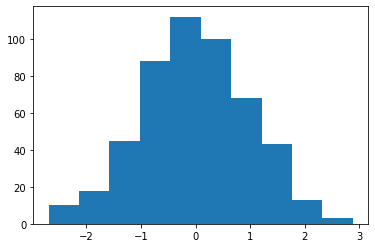

In [ ]:
zscore = lambda x: (x - x.mean())/x.std()
z_groups = double_group.transform(zscore)
plt.hist(z_groups["Age"])

### Relleno con la media utilizando transformaciones

In [ ]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [ ]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,106.003962,22.256354,35.541621,33026.181438
1,150.501501,59.809477,14.420658,28661.081968
2,152.325514,61.722966,28.510718,26418.024035
3,170.072346,63.285258,24.231337,27440.849756
4,175.847902,19.142239,6.500955,27905.125634
...,...,...,...,...
495,158.509576,57.418588,44.748160,32744.029154
496,216.158341,52.323133,21.173592,33182.748232
497,201.444737,49.893108,34.560105,40798.303915
498,142.746230,97.012030,22.794418,24614.480940


### Operaciones diversas muy Utiles
+ Si hacemos `.head(1)` nos devolvera la primera fila de cada uno de los grupos.

In [ ]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,106.003962,22.256354,35.541621,33026.181438
1,Male,Poor,150.501501,59.809477,14.420658,28661.081968
3,Male,Middie Class,170.072346,63.285258,24.231337,27440.849756
4,Male,Rich,175.847902,19.142239,6.500955,27905.125634
6,Female,Poor,175.110268,51.866695,36.441566,33784.575127
7,Female,Middie Class,117.113874,81.067444,29.422028,22898.865757


+ Si hacemos `.tail(1)` nos devolvera la ultima fila de cada uno de los grupos.

In [ ]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
475,Male,Rich,237.258376,114.370475,15.163252,17274.828656
490,Male,Poor,100.828111,41.299597,23.529084,23507.157579
496,Female,Poor,216.158341,52.323133,21.173592,33182.748232
497,Female,Rich,201.444737,49.893108,34.560105,40798.303915
498,Female,Middie Class,142.746230,97.012030,22.794418,24614.480940
499,Male,Middie Class,205.897589,65.979277,46.673038,36244.153269


+ Si hacemos `.nth(n)` nos devolvera los elementos de la fila n.

In [ ]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middie Class     115.520152  98.602757  13.243625  29947.244933
       Poor              95.292722  63.629477  43.932662  32209.001167
       Rich             137.491922  65.806421  11.651366  20016.483562
Male   Middie Class     172.395452  72.094443  32.291106  40622.822542
       Poor             179.518827  77.691715  25.545110  36002.213936
       Rich             195.126510  15.901933  31.552942  14407.195205

+ Si queresmos ordenar por ejemplo primero por edad y luego por ingreso.

In [ ]:
data_sorted = data.sort_values(["Age", "Income"])

+ Si queremos ordenar por los mas jovenes primero.

In [ ]:
age_grouped = data_sorted.groupby("Gender")

In [ ]:
age_grouped.head()

,Gender,Economic Status,Height,Weight,Age,Income
175,Male,Poor,123.170108,18.128724,-5.787750,23962.696875
445,Female,Poor,112.825240,34.558551,-2.906195,28634.163610
401,Female,Middie Class,142.273850,44.698805,-2.305830,34387.837692
130,Female,Poor,219.423463,40.766175,-1.127503,27509.869977
282,Female,Middie Class,106.529076,63.851889,2.484493,28596.687739
313,Female,Rich,168.149571,108.638506,2.626798,44775.772052
480,Male,Middie Class,221.141425,59.031862,2.802598,20477.174105
341,Male,Middie Class,167.452862,34.015741,3.475122,22421.939093
383,Male,Poor,171.120959,73.748715,3.795229,33876.821173
340,Male,Rich,134.965019,72.589745,5.429485,27582.271285


Atualización: cómo dividir conjunto de entrenamiento y test
En vez de utilizar la librería ya no existe:

from sklearn.cross_validation import train_test_split

ahora es mejor utilizar:

from sklearn.model_selection import train_test_split



También cuidado si quieres representar un vector de variables booleanas, ya que al hacer un histograma obtendrás un error. Ahora debes añadir un casting con .astype(int) al final de la lista de python para poderlo representar.

Antes: plt.hist(check)
Después plt.hist(check.astype(int))

## Conjunto de entrenamiento y conjunto de testing

In [ ]:
data = pd.read_csv("../data/customer-churn-model/Customer Churn Model.txt")

In [ ]:
len(data)

3333

### Dividir utilizando la distribucion normal

In [ ]:
a = np.random.randn(len(data))

In [ ]:
check = (a<0.8)

In [ ]:
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 747.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2586.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

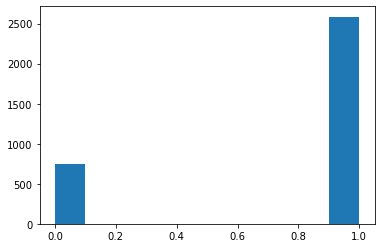

In [ ]:
plt.hist(check.astype(int))

In [ ]:
training = data[check]
testing = data[~check]

In [ ]:
len(training)

2586

In [ ]:
len(testing)

747

## Con libreria sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.2)

In [ ]:
len(train)

2666

In [ ]:
len(test)

667

### Utilizando una funcion de Shuffle

In [ ]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [ ]:
import sklearn


In [ ]:
data = sklearn.utils.shuffle(data)

In [ ]:
cut_id = int(len(data)*0.8)
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [ ]:
len(train_data)

2666

In [ ]:
len(test_data)

666